In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import cmath
import os

# Filtrage frequentiel:

#1. Lire et afficher l’image « goldhill.bmp »:

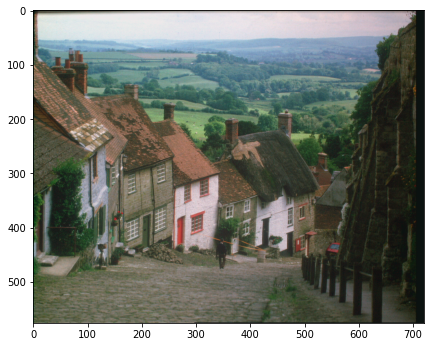

In [ ]:
image = cv.imread('/content/goldhill.bmp')
plt.figure(figsize=(7,7))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

# 2. Transformer l’image en niveaux de gris:

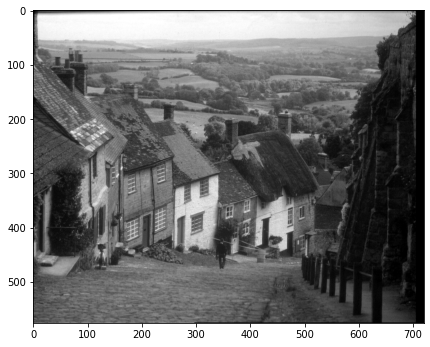

In [ ]:
plt.figure(figsize=(7,7))
img_gris = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(img_gris, cmap="gray")

#3. Bruit gaussien:

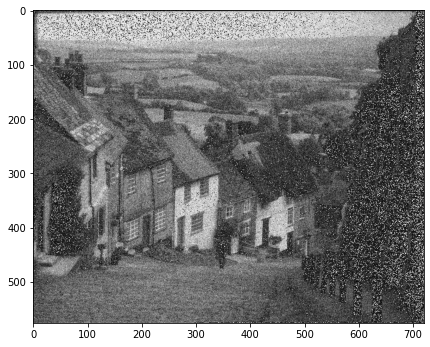

In [ ]:
bruit_gauss = np.random.normal(0,0.1,img_gris.shape)
bruit_gauss = np.multiply(bruit_gauss,255)
img_bruit = (img_gris+bruit_gauss).astype(np.uint8)
plt.figure(figsize=(7,7))
plt.imshow(img_bruit,cmap='gray')

# 4.Transformé de fourier de l'image:

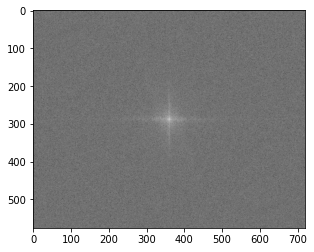

In [ ]:
f = np.fft.fft2(img_bruit)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()

## 5. La fonction de transfert :

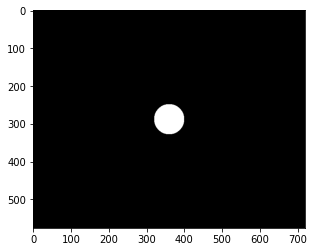

In [ ]:
nl,nc=img_bruit.shape
D0=40 #D0 fréquence de coupure du filtre
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2, nc/2, 1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H=z<D0
plt.imshow(H,cmap='gray')
plt.show()

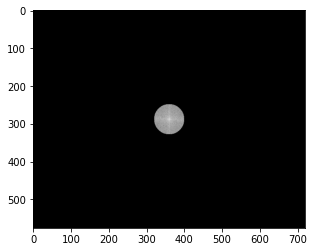

In [ ]:
multiply= magnitude_spectrum*H
plt.imshow(multiply,cmap='gray')


# 7. La transformee de fourier inverse:

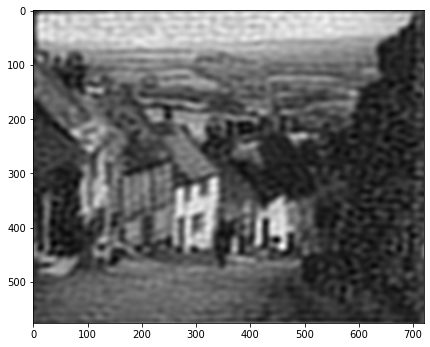

In [ ]:
plt.figure(figsize=(7,7))
f_ishift = np.fft.ifftshift(fshift*H)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
img_back=np.uint8(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()

# 8. Filtrage basse bande:

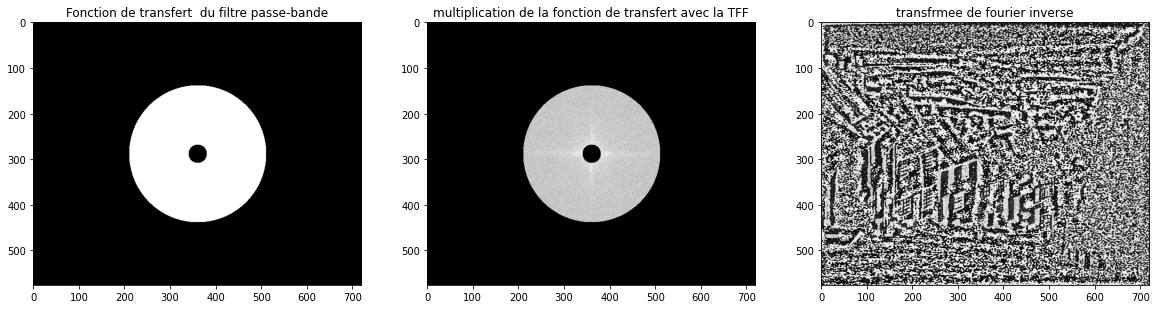

In [ ]:
plt.figure(figsize=(20,15))

# fonction de tranfert:

nl,nc = img_bruit.shape
D1 = 20
D2 = 150
x1 = np.arange(-nl/2,nl/2,1)
y1 = np.arange(-nc/2,nc/2,1)
xx1, yy1 = np.meshgrid(y1, x1, sparse=True)
z1 = np.sqrt(xx1*xx1+yy1*yy1)
H1 = z1 < D2
H2 = D1 < z1
H3 = H1*H2
plt.subplot(1,3,1)
plt.imshow(H3,cmap='gray')
plt.title("Fonction de transfert  du filtre passe-bande")



# multiplication:

multiply_bas= magnitude_spectrum*H3
plt.subplot(1,3,2)
plt.imshow(multiply_bas,cmap='gray')
plt.title("multiplication de la fonction de transfert avec la TFF")

# transforme de fourier inverse:


f_ishift1 = np.fft.ifftshift(fshift*H3)
img_back_bas = np.fft.ifft2(f_ishift1)
img_back_bas = np.real(img_back_bas)
img_back_bas=np.uint8(img_back_bas)
plt.subplot(1,3,3)
plt.imshow(img_back_bas,cmap='gray')
plt.title("transfrmee de fourier inverse")
plt.show()


# 8. Filtrage basse haut:

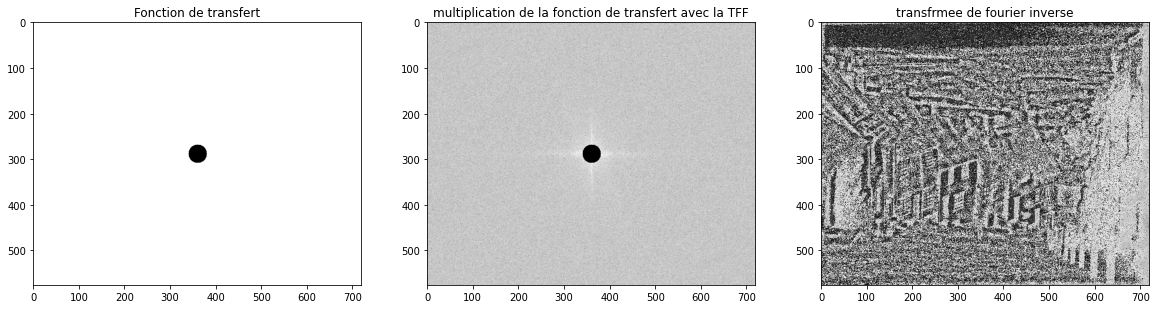

In [ ]:
plt.figure(figsize=(20,15))

# fonction de tranfert:

nl,nc=img_bruit.shape
D2=20 #D2 fréquence de coupure du filtre
x2 = np.arange(-nl/2,nl/2,1)
y2 = np.arange(-nc/2, nc/2, 1)
xx2, yy2 = np.meshgrid(y2, x2, sparse=True)
z2 = np.sqrt(xx2*xx2+yy2*yy2)
H_haut=z2>D2
plt.subplot(1,3,1)
plt.imshow(H_haut,cmap='gray')
plt.title("Fonction de transfert")


# multiplication:

multiply_haut= magnitude_spectrum*H_haut
plt.subplot(1,3,2)
plt.imshow(multiply_haut,cmap='gray')
plt.title("multiplication de la fonction de transfert avec la TFF")

# transforme de fourier inverse:


f_ishift2 = np.fft.ifftshift(fshift*H_haut)
img_back_haut = np.fft.ifft2(f_ishift2)
img_back_haut = np.real(img_back_haut)
img_back_haut=np.uint8(img_back_haut)
plt.subplot(1,3,3)
plt.imshow(img_back_haut,cmap='gray')
plt.title("transfrmee de fourier inverse")
plt.show()


# Conclusion:
A travers ce TP on a pu réduire le bruit d'une image, mais cette fois ci on utilisant des filtres fréquentielles, ce type de filtre:


1.   Il calcule la transformé de fourier du signal originale (l'image), ainsi que la transformée de fourier discrète du filtre.
2.   aprés on multiplie les deux spectres.
3.  et à la fin pour avoir l'image résultante, on calcule la tranformée de fourier inverse du spectre obtenu.
* Pour les filtres fréquentielles, on distingue trois types:
* **Les filtres passe bas:** Ce type de filtres élimine les hautes fréquences supérieres à une fréquence donnée D0 (les contours, le bruit, les textures ... ect), l'image obtenue est floue (lisse), le bruit est réduit (car le bruit est des hautes fréquences) mais on à perdue les détails de l'images (les contours qui sont aussi des hautes fréquences).
plus on réduit la valeur de D0 (on élimine beaucoup de fréquences )plus l'image obtenue sera plus lisse.
* **Les filtres passe haut:** Ce type de filtres élimine les bases fréquences inférieures à une fréquence donne D0, l'image obtenue contient encore du bruit,ce filtre a remplacé les zones unies par des valeurs proches de 0 (ils ont devenuent sombres) le filtre met en évidence les contours, et élimine les autres détails, ce type de filtre n'est pas trés adapté pour la réduction du bruit.
* **Les filtres passe bande:** Ce type de filtres garde que les fréquences qui sont comprises entre deux fréquences [D1; D2] , l'image obtenue contient encore du bruit, ce type de filtre n'est pas trés adapté pour la réduction du bruit.









